### Data Preparation

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
sns.set_style('darkgrid')

In [5]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [6]:
df.head()
# Regression Problem: Predict the price

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


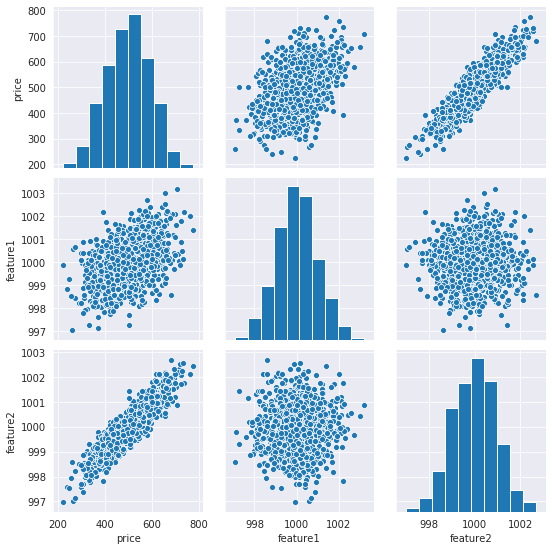

In [7]:
sns.pairplot(df)

In [8]:
# Step 2: Train-Test Split
from sklearn.model_selection import train_test_split

In [9]:
X = df[['feature1','feature2']].values

In [10]:
y = df['price'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train.shape

(700, 2)

In [13]:
X_test.shape

(300, 2)

In [14]:
# Normalize/Scale data
from sklearn.preprocessing import MinMaxScaler

In [15]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [16]:
scaler = MinMaxScaler()

In [17]:
# Calculate the parameters it needs to perform actual scaling
# MinMaxScaler is dependent on std, min and max value within particular datasets
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
X_train = scaler.transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [21]:
X_train.min()

0.0

In [22]:
X_train.max()

1.0

### Creating & Training Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
#model = Sequential([
    #(Dense(4,activation='relu')),
    #(Dense(2,activation='relu')),
    #(Dense(1))
    
#])

In [25]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')

In [26]:
model.fit(x=X_train,y=y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 3s 4ms/sample - loss: 256372.0059
Epoch 2/250
700/700 [==============================] - 0s 256us/sample - loss: 256161.9244
Epoch 3/250
700/700 [==============================] - 0s 253us/sample - loss: 255930.2688
Epoch 4/250
700/700 [==============================] - 0s 282us/sample - loss: 255661.7369
Epoch 5/250
700/700 [==============================] - 0s 278us/sample - loss: 255351.2005
Epoch 6/250
700/700 [==============================] - 0s 325us/sample - loss: 254991.9761
Epoch 7/250
700/700 [==============================] - 0s 291us/sample - loss: 254582.0027
Epoch 8/250
700/700 [==============================] - 0s 250us/sample - loss: 254113.9854
Epoch 9/250
700/700 [==============================] - 0s 282us/sample - loss: 253585.9212
Epoch 10/250
700/700 [==============================] - 0s 310us/sample - loss: 252989.5638
Epoch 11/250
700/700 [==============================] - 0s 248us/sampl

700/700 [==============================] - 0s 300us/sample - loss: 1491.6189
Epoch 91/250
700/700 [==============================] - 0s 259us/sample - loss: 1457.6578
Epoch 92/250
700/700 [==============================] - 0s 341us/sample - loss: 1424.4516
Epoch 93/250
700/700 [==============================] - 0s 266us/sample - loss: 1389.5051
Epoch 94/250
700/700 [==============================] - 0s 272us/sample - loss: 1355.9358
Epoch 95/250
700/700 [==============================] - 0s 319us/sample - loss: 1317.4500
Epoch 96/250
700/700 [==============================] - 0s 272us/sample - loss: 1280.8411
Epoch 97/250
700/700 [==============================] - 0s 277us/sample - loss: 1252.9107
Epoch 98/250
700/700 [==============================] - 0s 279us/sample - loss: 1214.4337
Epoch 99/250
700/700 [==============================] - 0s 279us/sample - loss: 1179.0160
Epoch 100/250
700/700 [==============================] - 0s 265us/sample - loss: 1148.5868
Epoch 101/250
700/700 

700/700 [==============================] - 0s 250us/sample - loss: 24.8337
Epoch 182/250
700/700 [==============================] - 0s 295us/sample - loss: 25.0574
Epoch 183/250
700/700 [==============================] - 0s 370us/sample - loss: 24.5342
Epoch 184/250
700/700 [==============================] - 0s 273us/sample - loss: 24.1180
Epoch 185/250
700/700 [==============================] - 0s 303us/sample - loss: 24.3033
Epoch 186/250
700/700 [==============================] - 0s 306us/sample - loss: 24.3106
Epoch 187/250
700/700 [==============================] - 0s 309us/sample - loss: 24.6836
Epoch 188/250
700/700 [==============================] - 0s 279us/sample - loss: 24.3174
Epoch 189/250
700/700 [==============================] - 0s 312us/sample - loss: 24.4662
Epoch 190/250
700/700 [==============================] - 0s 297us/sample - loss: 24.5585
Epoch 191/250
700/700 [==============================] - 0s 212us/sample - loss: 24.4835
Epoch 192/250
700/700 [============

In [27]:
loss_df = pd.DataFrame(model.history.history)

In [28]:
loss_df.head()

,loss
0,256372.005893
1,256161.924375
2,255930.268750
3,255661.736875
4,255351.200536


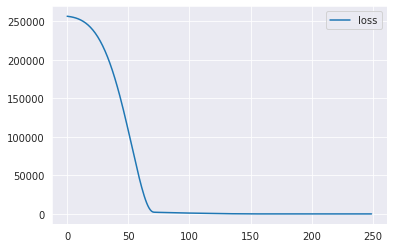

In [29]:
loss_df.plot()

### Model Evaluation

In [30]:
# Returns models loss on test sets
model.evaluate(X_test,y_test,verbose=0)

25.212646408081056

In [31]:
# Returns models loss on training sets
model.evaluate(X_train,y_train,verbose=0)

23.736074295043945

In [32]:
test_predictions = model.predict(X_test)

In [33]:
# List of price predicted based on X_test set
test_predictions

array([[405.58508],
       [624.0897 ],
       [592.6554 ],
       [572.6935 ],
       [366.8228 ],
       [579.6712 ],
       [515.4334 ],
       [459.48322],
       [549.6864 ],
       [447.8853 ],
       [612.32336],
       [549.45245],
       [419.40814],
       [409.15912],
       [651.87036],
       [437.64453],
       [508.90466],
       [660.4868 ],
       [663.1633 ],
       [566.0376 ],
       [334.41754],
       [445.1728 ],
       [382.7787 ],
       [379.02148],
       [567.07605],
       [611.1045 ],
       [532.82825],
       [428.18634],
       [656.006  ],
       [414.4046 ],
       [442.99234],
       [485.517  ],
       [438.75195],
       [682.44696],
       [425.10492],
       [417.9777 ],
       [502.38293],
       [550.9442 ],
       [510.1172 ],
       [395.5994 ],
       [619.1456 ],
       [416.9501 ],
       [604.9857 ],
       [446.33432],
       [502.39688],
       [582.2655 ],
       [669.6401 ],
       [490.81506],
       [318.79337],
       [485.8124 ],


In [34]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [35]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [36]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [37]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [38]:
pred_df

,Test True Y,0
0,402.296319,405.585083
1,624.156198,624.089722
2,582.455066,592.655396
3,578.588606,572.693481
4,371.224104,366.822815
...,...,...
295,525.704657,529.465210
296,502.909473,515.683472
297,612.727910,610.190613
298,417.569725,417.284668


In [39]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [40]:
pred_df

,Test True Y,Model Predictions
0,402.296319,405.585083
1,624.156198,624.089722
2,582.455066,592.655396
3,578.588606,572.693481
4,371.224104,366.822815
...,...,...
295,525.704657,529.465210
296,502.909473,515.683472
297,612.727910,610.190613
298,417.569725,417.284668


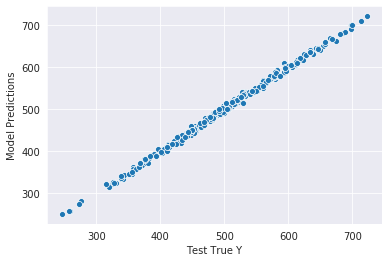

In [41]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])
# This means on average $4 far off from price point 
# It indicates that our model is performing very well in predicting the price base on the two features

4.032193394098993

In [44]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [45]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

25.212649220950944

In [46]:
# Root mean squared error
np.sqrt(mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions']))

5.0212198937062045

In [48]:
# Or RMSE
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

5.0212198937062045

In [49]:
# Ex. features
new_gem = [[998,1000]]

In [50]:
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [51]:
new_gem = scaler.transform(new_gem)

In [52]:
model.predict(new_gem)

array([[419.9579]], dtype=float32)

In [53]:
# Saving models
from tensorflow.keras.models import load_model

In [54]:
model.save('my_gem_model.h5')

In [55]:
later_model = load_model('my_gem_model.h5')

In [56]:
later_model.predict(new_gem)

array([[419.9579]], dtype=float32)